# Deep Learning

**Abedin Sherifi**

# Learning Affordance for Direct Perception in Autonomous Driving by Chenyi Chen, et al
# Paper Summary

### Vision based autonomous driving:
-> mediated perception approach – parse entire frame in order to make driving decision
-> behavior reflex approach – directly map input image to a driving action by a regressor

Direct perception method developed by this paper.
Trained a deep CNN using a recording from 12 hours of human driving in a video game. 
Trained model in car distance estimation using KITTI dataset.

**5 convnet layers followed by 4 fully connected layers (4096, 4096, 256, and 13 for output dimensions). 
Screenshots are down-sampled to 280 x 210.** 

They collected **484,815 images for training.** 

Initial **learning rate** of 0.01

**mini batch of 64 images randomly selected** from the training samples

after 140,000 iterations they stopped the training process. 

7 different tracks and 22 different cars used

**The convnet processes the TORCS images and estimates the 13 indicators for driving. Based on indicators and speed of car, controller will send commands to the car.**

**13 affordance indicators:**
angle
toMarking_LL
toMarking_ML
toMarking_MR
toMarking_RR
dist_LL
dist_MM
dist_RR
toMarking_L
toMarking_M
toMarking_R
dist_L
dist_R

# End to End Learning for Self-Driving Cars by NVIDIA
# Paper Summary

**Trained a CNN to map raw pixels from a single camera image directly to steering commands. 
System operating at 30 FPS.**

CNNs widely used due to Large Scale Visual Recognition Challenge (ILSVRC) dataset for training and testing and due to GPUs. 

**CNN Layout:**
Input Plane (3@66x200)
Normalization
Normalized input plane (3@66x200)
Convolutional feature map (24@31x98)
Convolutional feature map (36@14x47)
Convolutional feature map (48@5x22)
Convolutional feature map (64@3x20)
Convolutional feature map (64@1x18)
Flatten
1164 neurons dense layer
100 neurons dense layer
50 neurons dense layer
10 neurons dense layer
outpur (vehicle control)

**convo layers perform feature extraction. They have different kernel sizes either 3x3 or 5x5 in this case.** 

**In data augmentation, the set of frames are augmented by adding artificial shifts and rotations.** 

No labels were used for outline of road etc. The steering commands sent out from the network were 1/r, where r is the the turn radius. 

# Deep Learning Notes

**Regression** is when a model, such as a neural network, accepts input and produces a numeric output.
The output of a **classification** model is what class the input belongs to.

**In deep learning, the more data present the higher the performance.**

CNNs can scan an  image for patterns within the image. 
Recurrent NN can find patterns across several inputs, not just within a single input. 

**Frameworks for deep learning**: TensorFlow (Google), MXNet (Amazon), Theano (Univ of Montreal), and CNTK (Microsoft). 

Keras – is a high-level neural network API, written in Python and able to run on top of TensorFlow, CNTK, or Theano


Data fed into a machine learning model needs to be normalized. **Zscore** used for normalization. 

Z = input – mean / standard deviation. 

Training/Validation split (80/20) or K-Fold Cross Validation

Activation functions, also known as transfer functions, are used to calculate the output of each layer of a neural network. 

**ReLU (Rectified Linear Unit) used for output of hidden layers. 
Softmax used for the output of classification neural networks. 
Linear used for the output of regression neural networks.**

ReLU = max(0,𝑥)


**hidden layer values = A (W1 * x + b1), where A is the activation function, x is the input, W1 is the weight, and b1 is the bias.** 

Good idea to save big neural networks so they can be reloaded later. A reloaded nn will not require training. NN can be saved as YAML (just structure no weights) or JSON (just structure no weights) or HDF5 (structure + weights). 

**Overfitting** occurs when a neural network is trained to the point that it begins to memorize rather than generalize. 

The **mean square error** is the sum of the squared differences between the prediction (𝑦̂ ) and the expected (𝑦). MSE values are not of a particular unit. If an MSE value has decreased for a model, that is good. However, beyond this, there is not much more you can determine. Low MSE values are desired.

The **root mean square (RMSE)** is essentially the square root of the MSE. Because of this, the RMSE error is in the same units as the training data outcome. Low RMSE values are desired.

# Helpful Functions

In [57]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
import requests
import base64

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return pd.DataFrame(df,columns=result).to_numpy(dtype=np.float32), dummies.to_numpy(dtype=np.float32)
    else:
        # Regression
        return pd.DataFrame(df,columns=result).to_numpy(dtype=np.float32), pd.DataFrame(df,columns=[target]).to_numpy(dtype=np.float32)

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

The cell block below reads the csv file using pandas. 

In [92]:
import os
import pandas as pd
from scipy.stats import zscore
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics


path = "./data/"

filename_read = os.path.join(path,"Tetuan City power consumption.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

df.head()
#print(df.columns)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


The cell block below drops three columns from the dataframe. 
zscore is used to normalize all the input columns except the target column. 

In [93]:
df.drop(['DateTime'], axis=1, inplace=True)
df.drop(['Zone 1 Power Consumption'], axis=1, inplace=True)
df.drop(['Zone 2  Power Consumption'], axis=1, inplace=True)

df['Temperature'] = zscore(df['Temperature'])
df['Humidity'] = zscore(df['Humidity'])
df['Wind Speed'] = zscore(df['Wind Speed'])
df['general diffuse flows'] = zscore(df['general diffuse flows'])
df['diffuse flows'] = zscore(df['diffuse flows'])

df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 3 Power Consumption
0,-2.106645,0.356277,-0.798900,-0.690797,-0.603085,20240.96386
1,-2.131578,0.401291,-0.798900,-0.690725,-0.603359,20131.08434
2,-2.148946,0.401291,-0.800178,-0.690755,-0.603238,19668.43373
3,-2.181962,0.433443,-0.798900,-0.690646,-0.603270,18899.27711
4,-2.216353,0.478456,-0.799752,-0.690808,-0.603359,18442.40964


The cell block below scales the target column down due to the large values in contains. This will help downstream with the model run.

In [94]:
df['target'] = df['Zone 3  Power Consumption'] / 1000


The cell block below drops the raw target column and keeps only the scaled down target column.

In [95]:
df.drop(['Zone 3  Power Consumption'], axis=1, inplace=True)

In [96]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,target
0,-2.106645,0.356277,-0.798900,-0.690797,-0.603085,20.240964
1,-2.131578,0.401291,-0.798900,-0.690725,-0.603359,20.131084
2,-2.148946,0.401291,-0.800178,-0.690755,-0.603238,19.668434
3,-2.181962,0.433443,-0.798900,-0.690646,-0.603270,18.899277
4,-2.216353,0.478456,-0.799752,-0.690808,-0.603359,18.442410


The cell block below first converts the input/target columns from the dataframe to tensorflow format. 
Then the sequential model is created with several dense layers. A dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.

I am using the rectified linear activation function. In neural networks, the activation function is a function that is used for the transformation of the input values of neurons. Basically, it introduces the non-linearity into the networks of neural networks so that the networks can learn the relationship between the input and output values.

In [82]:
x,y = to_xy(df,"target")
print(x.shape)
print(y.shape)
model = Sequential()
model.add(Dense(200, input_dim=x.shape[1], activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=50)

(52416, 5)
(52416, 1)
Epoch 1/50
 - 2s - loss: 28.9623
Epoch 2/50
 - 1s - loss: 23.2934
Epoch 3/50
 - 1s - loss: 22.8364
Epoch 4/50
 - 1s - loss: 22.4977
Epoch 5/50
 - 1s - loss: 22.2534
Epoch 6/50
 - 1s - loss: 21.9381
Epoch 7/50
 - 1s - loss: 21.7680
Epoch 8/50
 - 1s - loss: 21.4872
Epoch 9/50
 - 1s - loss: 21.3053
Epoch 10/50
 - 1s - loss: 21.1896
Epoch 11/50
 - 1s - loss: 20.9873
Epoch 12/50
 - 1s - loss: 20.8957
Epoch 13/50
 - 2s - loss: 20.6818
Epoch 14/50
 - 1s - loss: 20.5669
Epoch 15/50
 - 1s - loss: 20.5384
Epoch 16/50
 - 1s - loss: 20.4236
Epoch 17/50
 - 1s - loss: 20.3275
Epoch 18/50
 - 1s - loss: 20.2632
Epoch 19/50
 - 1s - loss: 20.1045
Epoch 20/50
 - 1s - loss: 20.0364
Epoch 21/50
 - 1s - loss: 19.9340
Epoch 22/50
 - 1s - loss: 19.9233
Epoch 23/50
 - 1s - loss: 19.7685
Epoch 24/50
 - 1s - loss: 19.7131
Epoch 25/50
 - 1s - loss: 19.6604
Epoch 26/50
 - 2s - loss: 19.6386
Epoch 27/50
 - 1s - loss: 19.6268
Epoch 28/50
 - 1s - loss: 19.5578
Epoch 29/50
 - 1s - loss: 19.3827
E

The cell block below will make predictions on the inputs. 

In [97]:
pred = model.predict(x)
print("Shape: {}".format(pred.shape))
print(pred)

Shape: (52416, 1)
[[16.27742 ]
 [16.24805 ]
 [16.423155]
 ...
 [16.050163]
 [16.223845]
 [16.117815]]


The cell block below will try to find the MSE and RMSE errors. 

In [98]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print("Final score (RMSE): {}".format(score))

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y)
print("Final score (MSE): {}".format(score))

Final score (RMSE): 4.306538105010986
Final score (MSE): 18.54627227783203


The cell block below will print target and predictions. Note here that we are multiplying back by 1000 in order to bring the target back to oringinal values. 

In [99]:
# Sample predictions
for i in range(50):
    print("{}. Target: {}, predicted Target: {}".format(i+1,y[i]*1000,pred[i]*1000))

1. Target: [20240.963], predicted Target: [16277.42]
2. Target: [20131.084], predicted Target: [16248.051]
3. Target: [19668.434], predicted Target: [16423.154]
4. Target: [18899.277], predicted Target: [16536.389]
5. Target: [18442.41], predicted Target: [16492.596]
6. Target: [18130.121], predicted Target: [15959.292]
7. Target: [17945.06], predicted Target: [15818.521]
8. Target: [17459.275], predicted Target: [15652.998]
9. Target: [17025.541], predicted Target: [15467.721]
10. Target: [16794.217], predicted Target: [16287.443]
11. Target: [16638.072], predicted Target: [16142.182]
12. Target: [16395.182], predicted Target: [16599.535]
13. Target: [16117.59], predicted Target: [15691.026]
14. Target: [15822.651], predicted Target: [15618.36]
15. Target: [15672.289], predicted Target: [15596.558]
16. Target: [15597.108], predicted Target: [15530.149]
17. Target: [15510.361], predicted Target: [15087.992]
18. Target: [15336.867], predicted Target: [15553.387]
19. Target: [15140.24], 

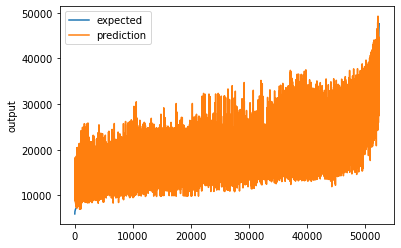

In [100]:
chart_regression(pred.flatten()*1000, y*1000)